<a href="https://colab.research.google.com/github/spaceship17/Data-Analysis-Series/blob/main/Water_Consumption_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


In [ ]:

# Load the data
df = pd.read_excel('data.xlsx', sheet_name= 'Data')


# Load the data
df = pd.read_excel('/content/data.xlsx')

# Identify numeric and categorical columns based on the actual data types
numeric_features = ['PCC', 'IMD', 'AGE', 'OCCUPANCY']
categorical_features = ['CACI', 'TARIFF', 'CUSTOMER_EMPLOYMENT_STATUS', 'CUSTOMER_HOME_OWNER_STATUS']

# Handle missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])

# Handle missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

# Perform basic statistical analysis
print("Numeric Features Summary:")
print(df[numeric_features].describe())

print("\nCategorical Features Summary:")
for cat in categorical_features:
    print(f"\nValue counts for {cat}:")
    print(df[cat].value_counts(normalize=True))

# Check for any remaining missing values
print("\nRemaining missing values:")
print(df.isnull().sum())

Numeric Features Summary:
                PCC          IMD          AGE    OCCUPANCY
count   1000.000000  1000.000000  1000.000000  1000.000000
mean     152.694100     5.874871    57.065000     2.174000
std      499.885569     2.951707    17.976204     1.154581
min       15.200000     1.000000    19.000000     1.000000
25%       83.450000     3.000000    43.000000     1.000000
50%      113.100000     6.000000    56.000000     2.000000
75%      156.200000     8.250000    72.000000     3.000000
max    15500.000000    10.000000    96.000000     8.000000

Categorical Features Summary:

Value counts for CACI:
CACI
D - Comfortable mid-life established families    0.260
A - Budget conscious elderly                     0.205
E - Financially secure empty nesters             0.166
C - Technology dependent young families          0.162
H - Families getting by                          0.066
F - Hard-pressed families                        0.064
G - Struggling single pensioners                 0.03

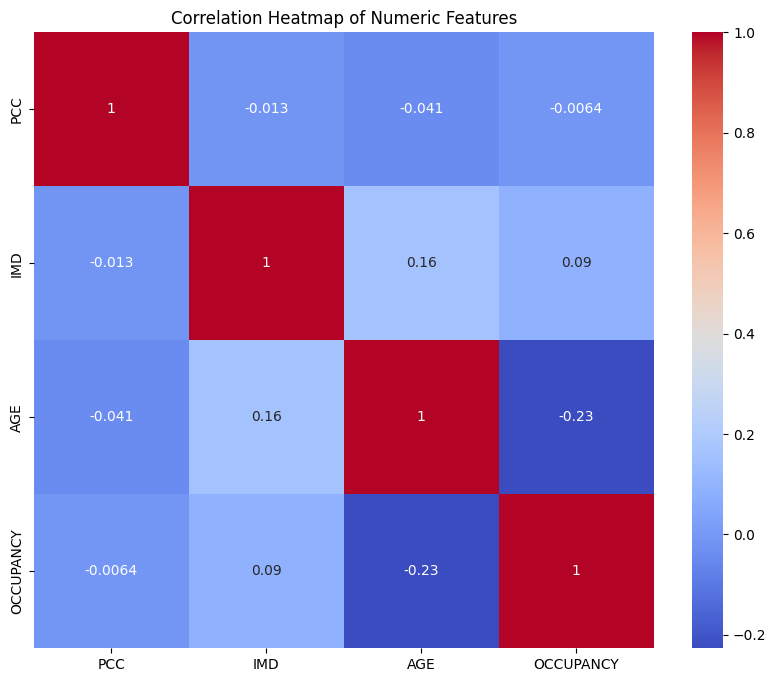

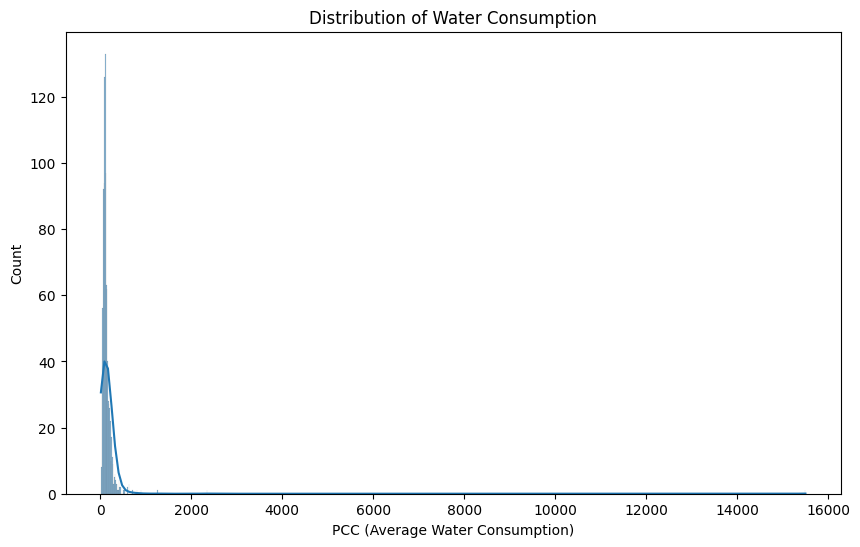

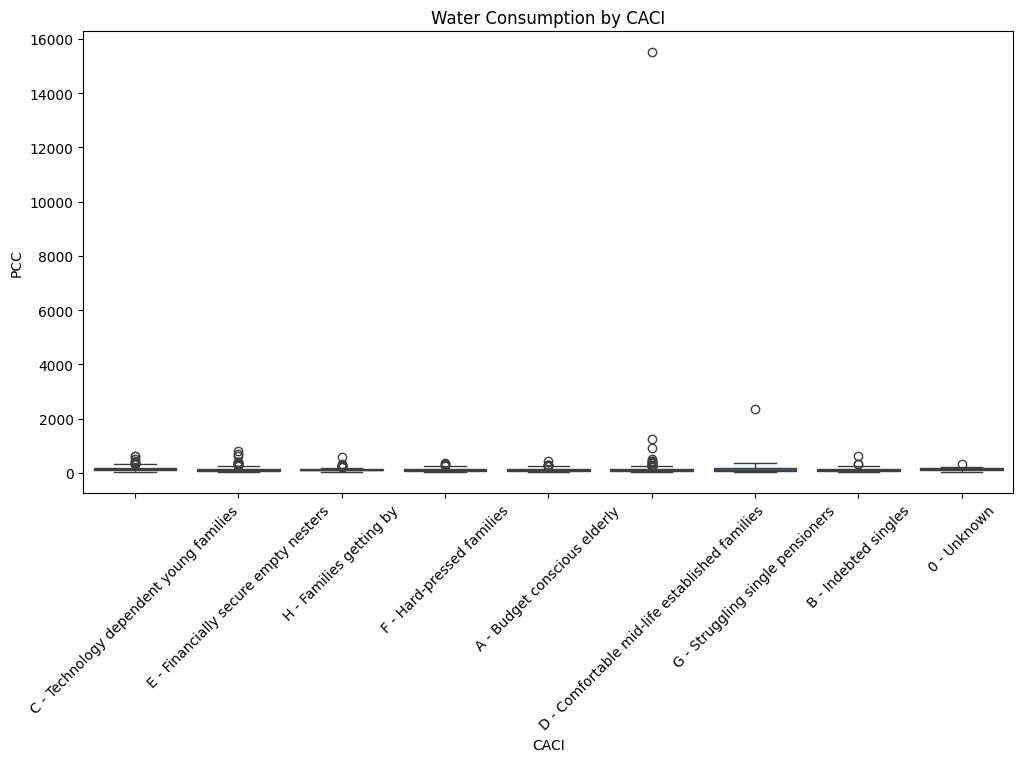

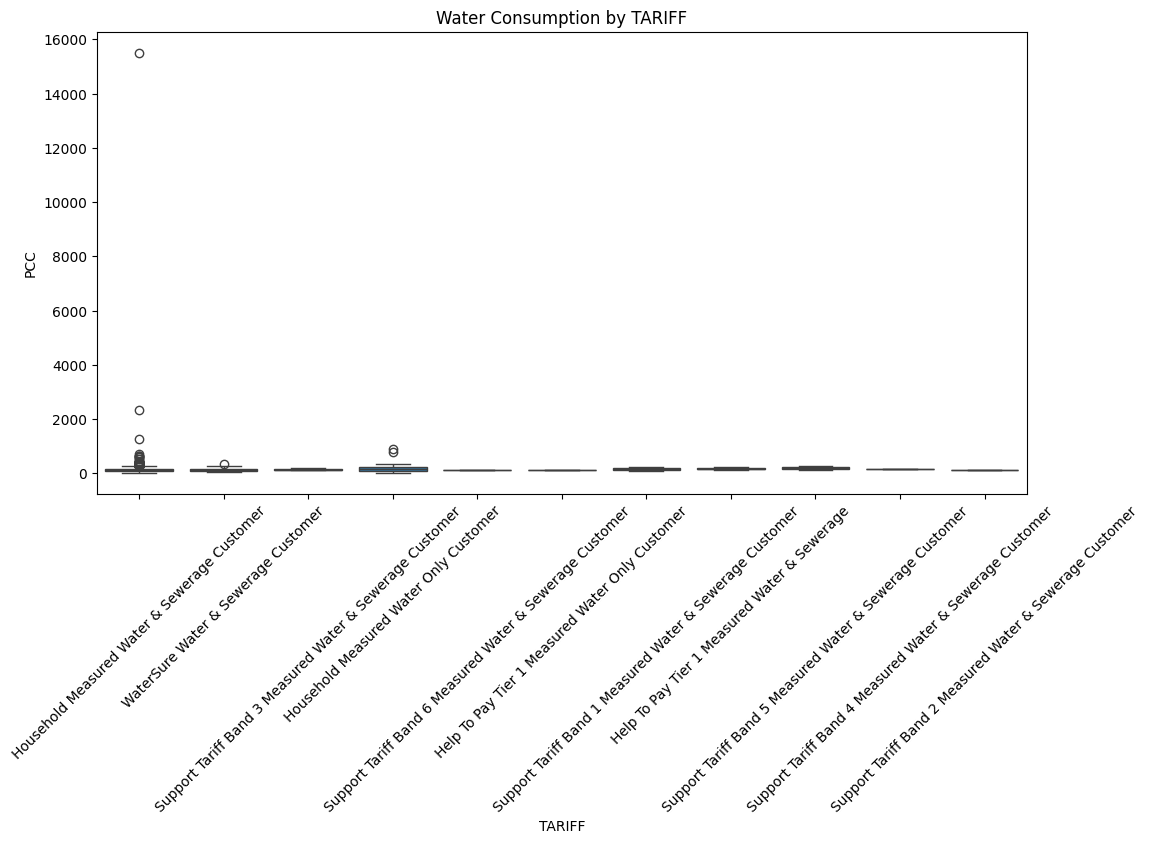

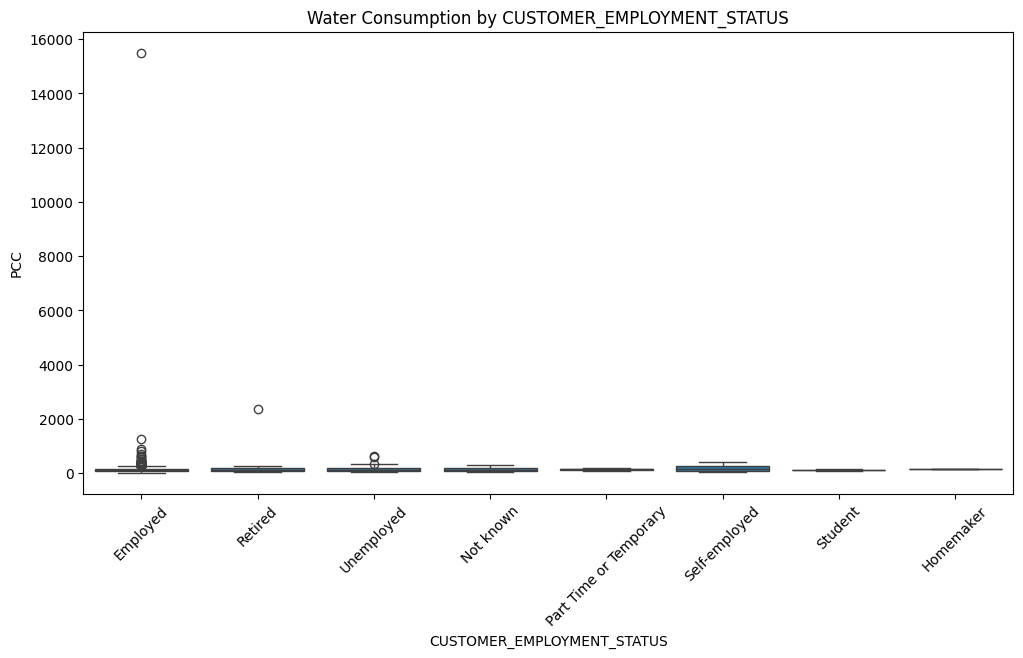

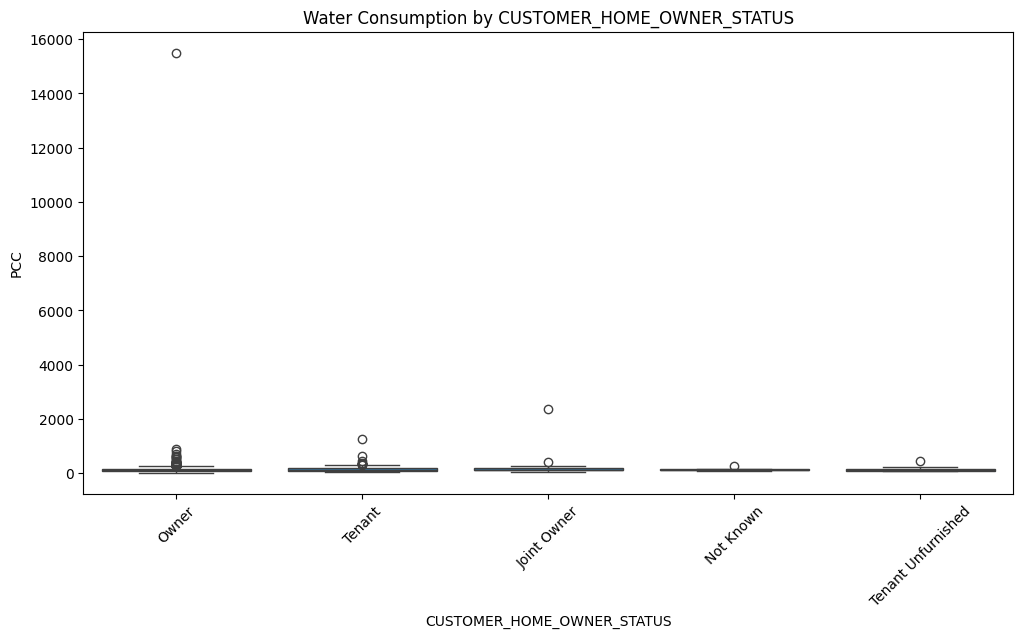

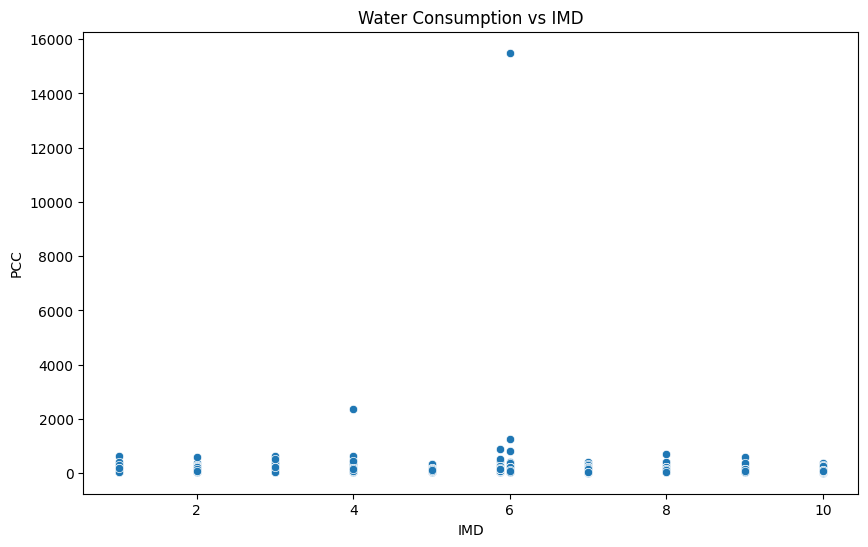

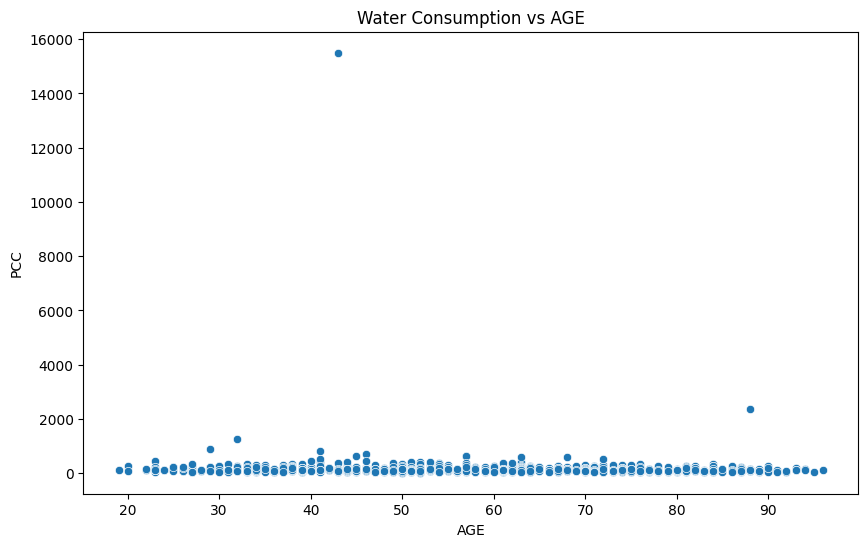

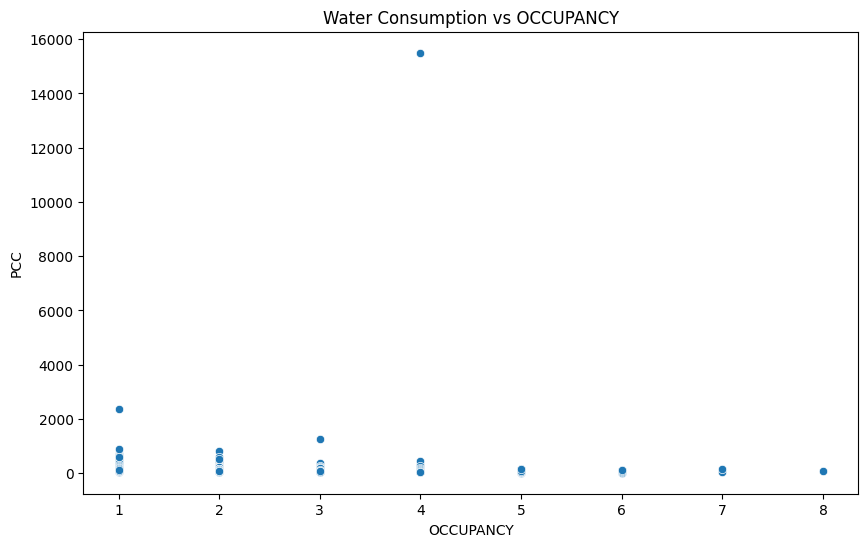

In [ ]:
# Correlation analysis for numeric features
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Distribution of water consumption (PCC)
plt.figure(figsize=(10, 6))
sns.histplot(df['PCC'], kde=True)
plt.title('Distribution of Water Consumption')
plt.xlabel('PCC (Average Water Consumption)')
plt.show()

# Box plots for categorical features vs PCC
for cat in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cat, y='PCC', data=df)
    plt.title(f'Water Consumption by {cat}')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plots for numeric features vs PCC
for num in numeric_features:
    if num != 'PCC':  # Exclude PCC itself
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=num, y='PCC', data=df)
        plt.title(f'Water Consumption vs {num}')
        plt.show()

Number of outliers in PCC: 67
Outliers (showing ID and PCC):
      ID    PCC
3      4  361.4
9     10  347.4
47    48  284.2
49    50  633.5
61    62  284.2
..   ...    ...
863  864  380.4
907  908  900.5
924  925  313.7
928  929  597.3
951  952  273.4

[67 rows x 2 columns]


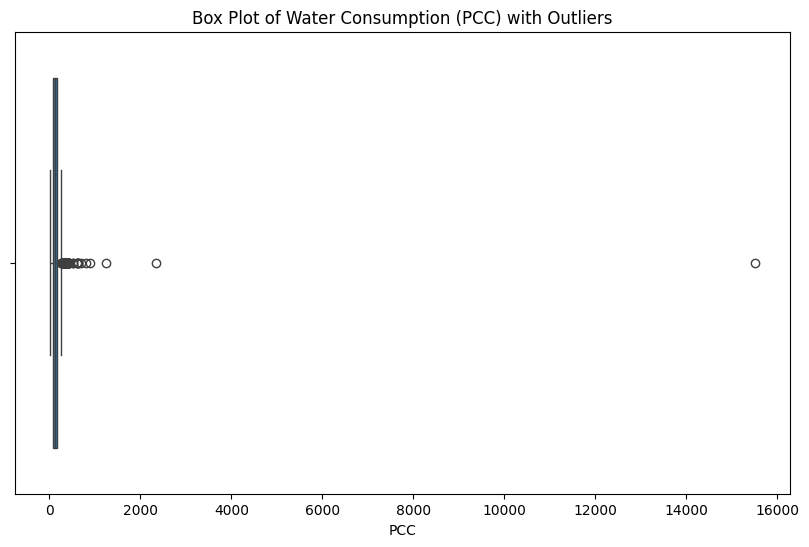

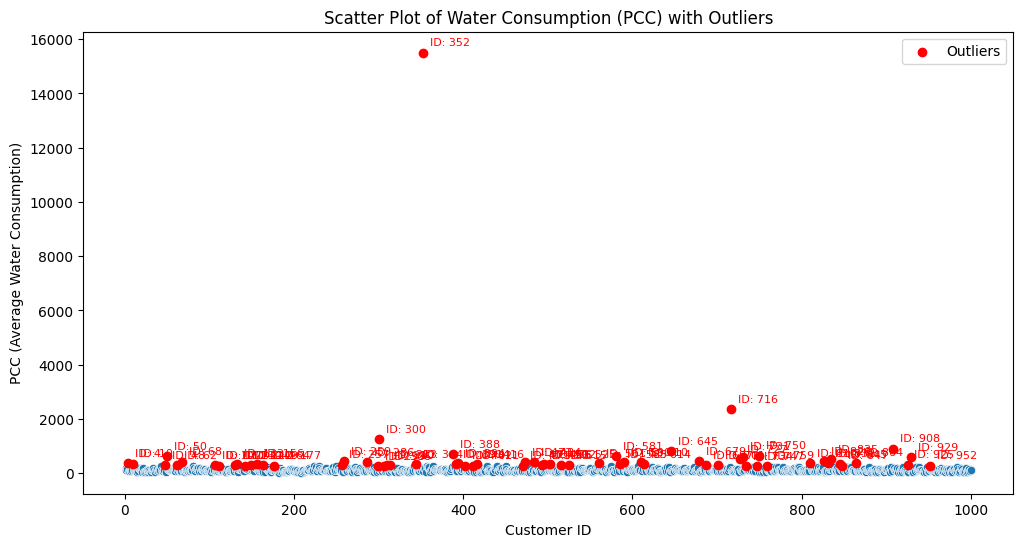


Top 10 Highest Consumers:
      ID      PCC
351  352  15500.0
715  716   2346.3
299  300   1254.1
907  908    900.5
644  645    803.1
387  388    700.9
749  750    639.4
49    50    633.5
580  581    632.4
730  731    608.7

Top 10 Lowest Consumers:
      ID   PCC
207  208  15.2
181  182  22.8
887  888  23.4
757  758  24.1
507  508  26.3
247  248  26.5
537  538  26.6
526  527  28.9
946  947  30.9
994  995  30.9


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in PCC
pcc_outliers = detect_outliers(df, 'PCC')
print(f"Number of outliers in PCC: {len(pcc_outliers)}")
print("Outliers (showing ID and PCC):")
print(pcc_outliers[['ID', 'PCC']])

# Visualize outliers in a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PCC'])
plt.title('Box Plot of Water Consumption (PCC) with Outliers')
plt.show()

# Visualize outliers in a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ID', y='PCC', data=df)
plt.scatter(pcc_outliers['ID'], pcc_outliers['PCC'], color='red', label='Outliers')
plt.title('Scatter Plot of Water Consumption (PCC) with Outliers')
plt.xlabel('Customer ID')
plt.ylabel('PCC (Average Water Consumption)')
plt.legend()

# Annotate outliers with their IDs
for idx, row in pcc_outliers.iterrows():
    plt.annotate(f"ID: {row['ID']}", (row['ID'], row['PCC']), xytext=(5, 5),
                 textcoords='offset points', fontsize=8, color='red')

plt.show()

# Optional: Display top 10 highest consumers
print("\nTop 10 Highest Consumers:")
print(df.nlargest(10, 'PCC')[['ID', 'PCC']])

# Optional: Display top 10 lowest consumers
print("\nTop 10 Lowest Consumers:")
print(df.nsmallest(10, 'PCC')[['ID', 'PCC']])

Mean Squared Error: 1199507.1960232484
R-squared Score: -0.009954127795819057


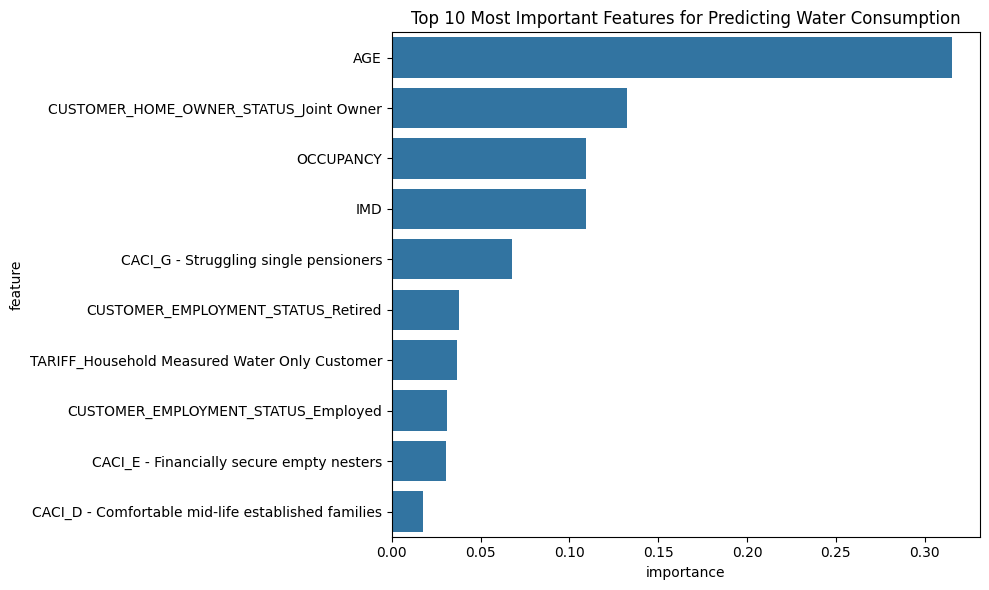


Top 10 Most Important Features:
                                              feature  importance
1                                                 AGE    0.315328
30             CUSTOMER_HOME_OWNER_STATUS_Joint Owner    0.132383
2                                           OCCUPANCY    0.109394
0                                                 IMD    0.109116
10              CACI_G - Struggling single pensioners    0.067740
26                 CUSTOMER_EMPLOYMENT_STATUS_Retired    0.038032
14      TARIFF_Household Measured Water Only Customer    0.036456
22                CUSTOMER_EMPLOYMENT_STATUS_Employed    0.031147
8           CACI_E - Financially secure empty nesters    0.030639
7   CACI_D - Comfortable mid-life established fami...    0.017730

Basic statistics of PCC (water consumption):
count     1000.000000
mean       152.694100
std        499.885569
min         15.200000
25%         83.450000
50%        113.100000
75%        156.200000
max      15500.000000
Name: PCC, dtype: f

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for modeling
X = df.drop(['ID', 'PCC'], axis=1)
y = df['PCC']

# Identify numeric and categorical columns
numeric_features = ['IMD', 'AGE', 'OCCUPANCY']
categorical_features = ['CACI', 'TARIFF', 'CUSTOMER_EMPLOYMENT_STATUS', 'CUSTOMER_HOME_OWNER_STATUS']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
feature_importance = model.named_steps['regressor'].feature_importances_
numeric_feature_names = numeric_features
categorical_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = list(numeric_feature_names) + list(categorical_feature_names)

importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(10))
plt.title('Top 10 Most Important Features for Predicting Water Consumption')
plt.tight_layout()
plt.show()

# Print the top 10 most important features
print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

# Basic statistics of the target variable
print("\nBasic statistics of PCC (water consumption):")
print(df['PCC'].describe())

# Check for any extreme values in PCC
print("\nTop 5 highest PCC values:")
print(df.nlargest(5, 'PCC')[['PCC', 'ID']])

print("\nTop 5 lowest PCC values:")
print(df.nsmallest(5, 'PCC')[['PCC', 'ID']])


Basic statistics of PCC (water consumption):
count     1000.000000
mean       152.694100
std        499.885569
min         15.200000
25%         83.450000
50%        113.100000
75%        156.200000
max      15500.000000
Name: PCC, dtype: float64

Top 5 highest PCC values:
         PCC   ID
351  15500.0  352
715   2346.3  716
299   1254.1  300
907    900.5  908
644    803.1  645

Top 5 lowest PCC values:
      PCC   ID
207  15.2  208
181  22.8  182
887  23.4  888
757  24.1  758
507  26.3  508


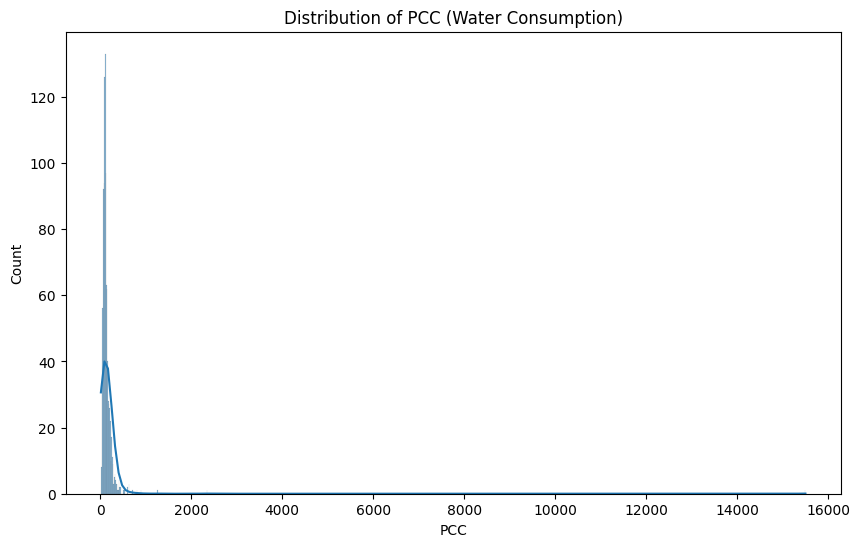

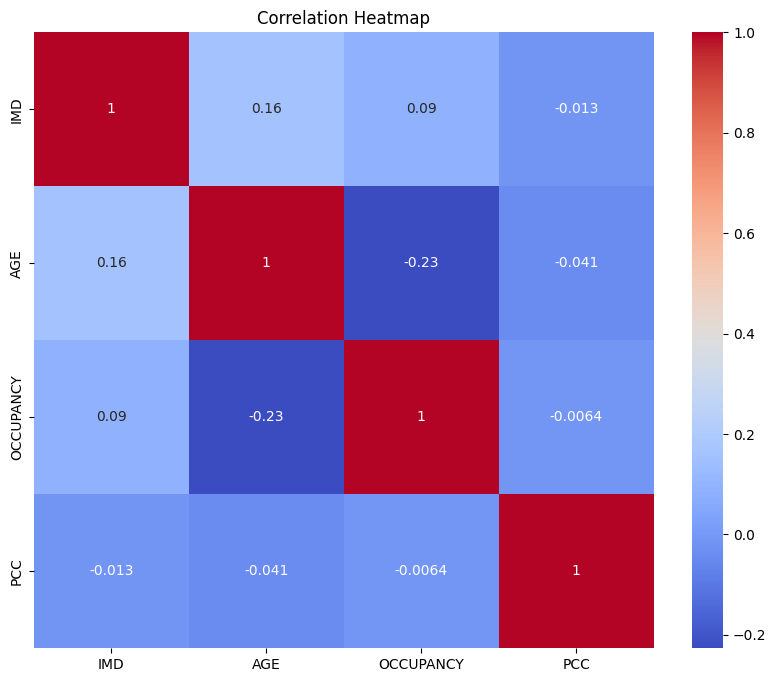

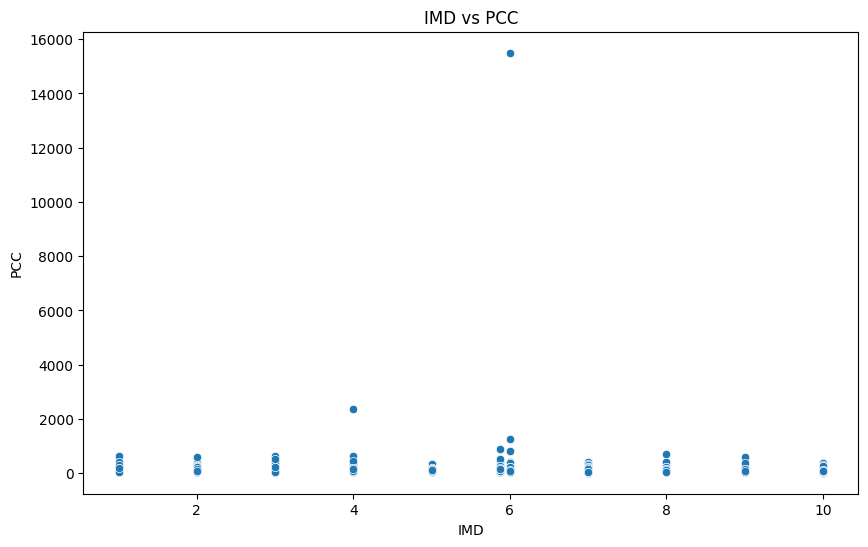

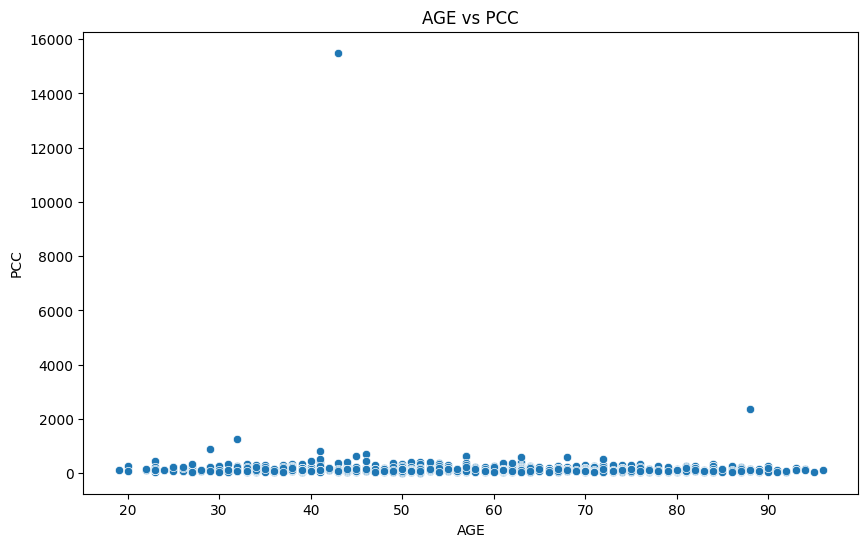

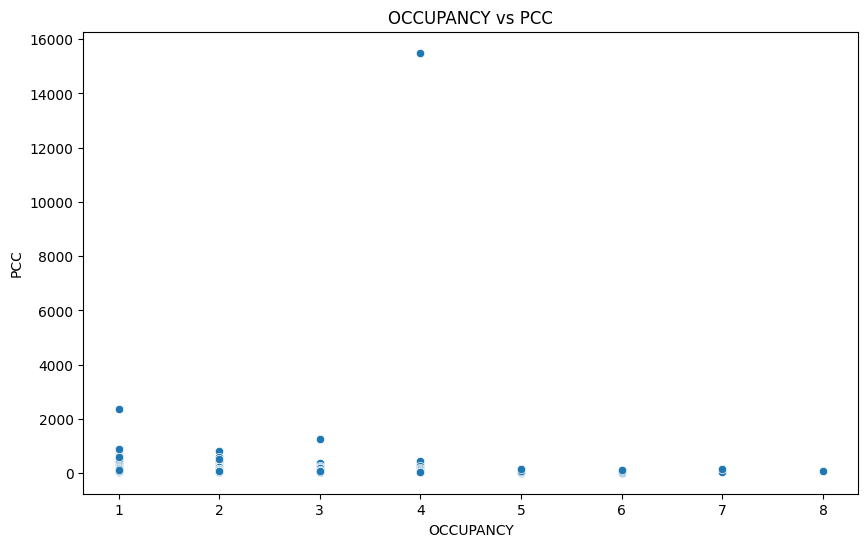

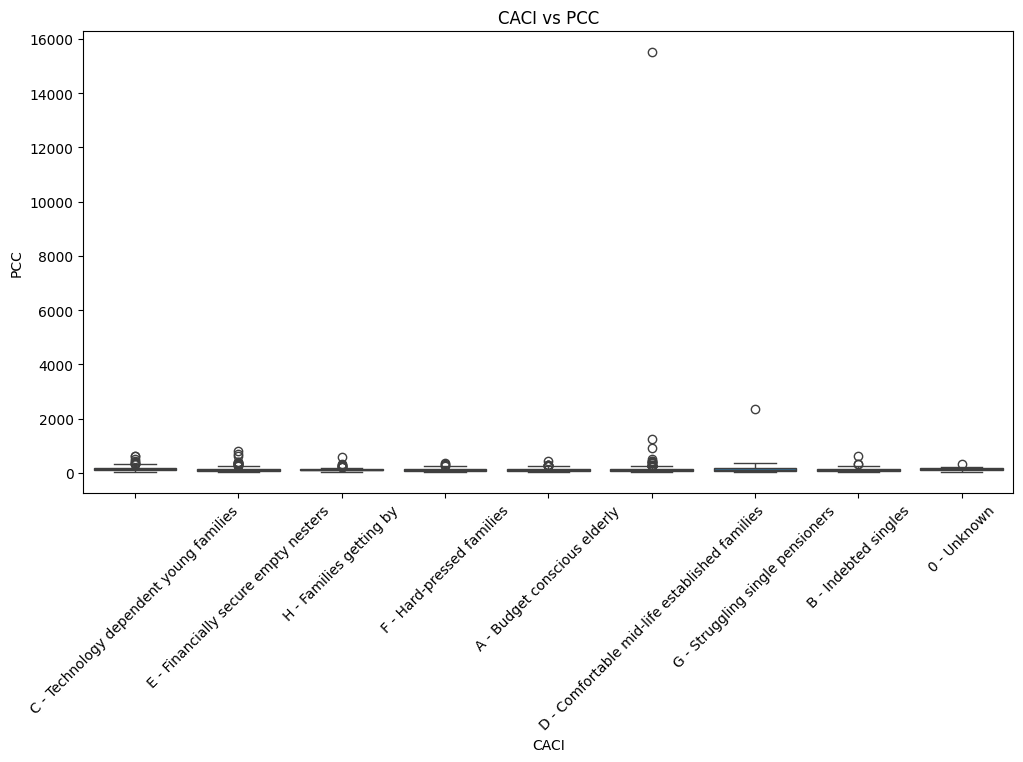

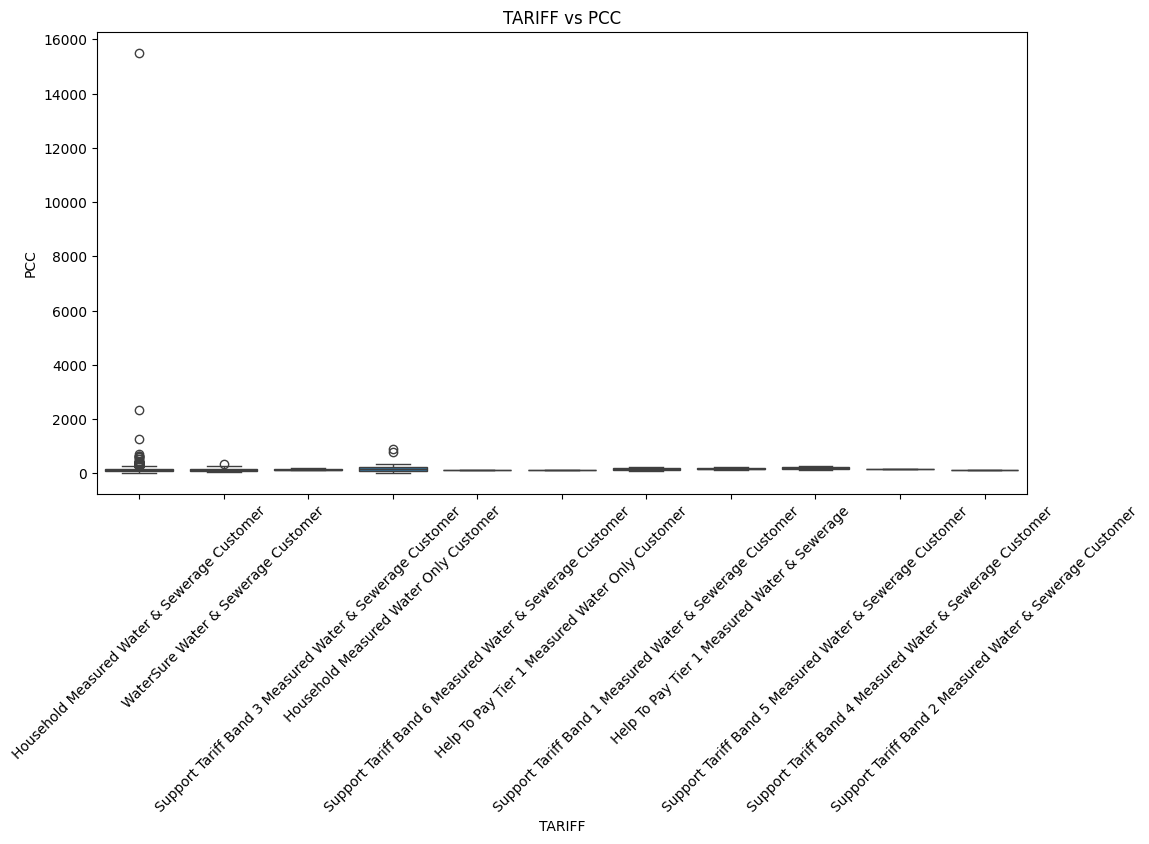

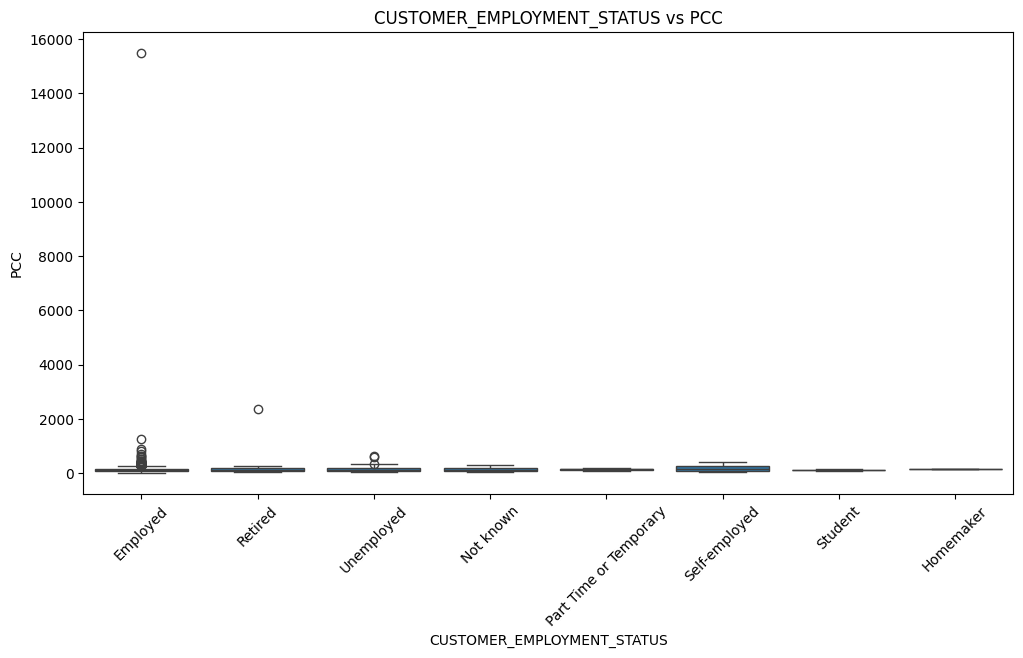

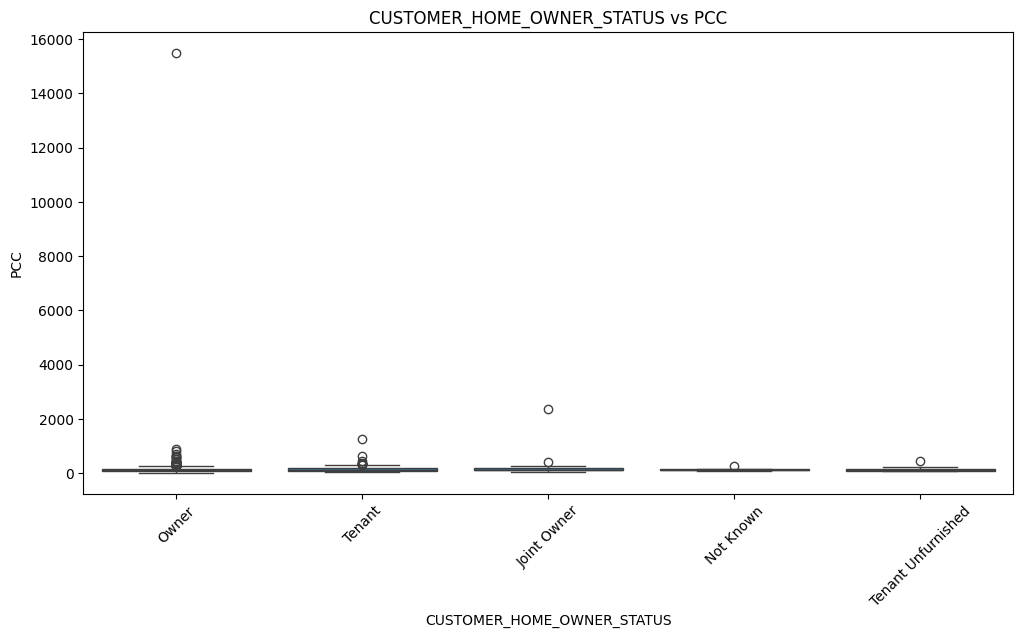

In [ ]:
# Basic statistics of the target variable
print("\nBasic statistics of PCC (water consumption):")
print(df['PCC'].describe())

# Check for any extreme values in PCC
print("\nTop 5 highest PCC values:")
print(df.nlargest(5, 'PCC')[['PCC', 'ID']])

print("\nTop 5 lowest PCC values:")
print(df.nsmallest(5, 'PCC')[['PCC', 'ID']])

# Distribution of PCC
plt.figure(figsize=(10, 6))
sns.histplot(df['PCC'], kde=True)
plt.title('Distribution of PCC (Water Consumption)')
plt.xlabel('PCC')
plt.show()

# Correlation matrix
correlation_matrix = df[numeric_features + ['PCC']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots for numeric features vs PCC
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='PCC', data=df)
    plt.title(f'{feature} vs PCC')
    plt.show()

# Box plots for categorical features vs PCC
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='PCC', data=df)
    plt.title(f'{feature} vs PCC')
    plt.xticks(rotation=45)
    plt.show()

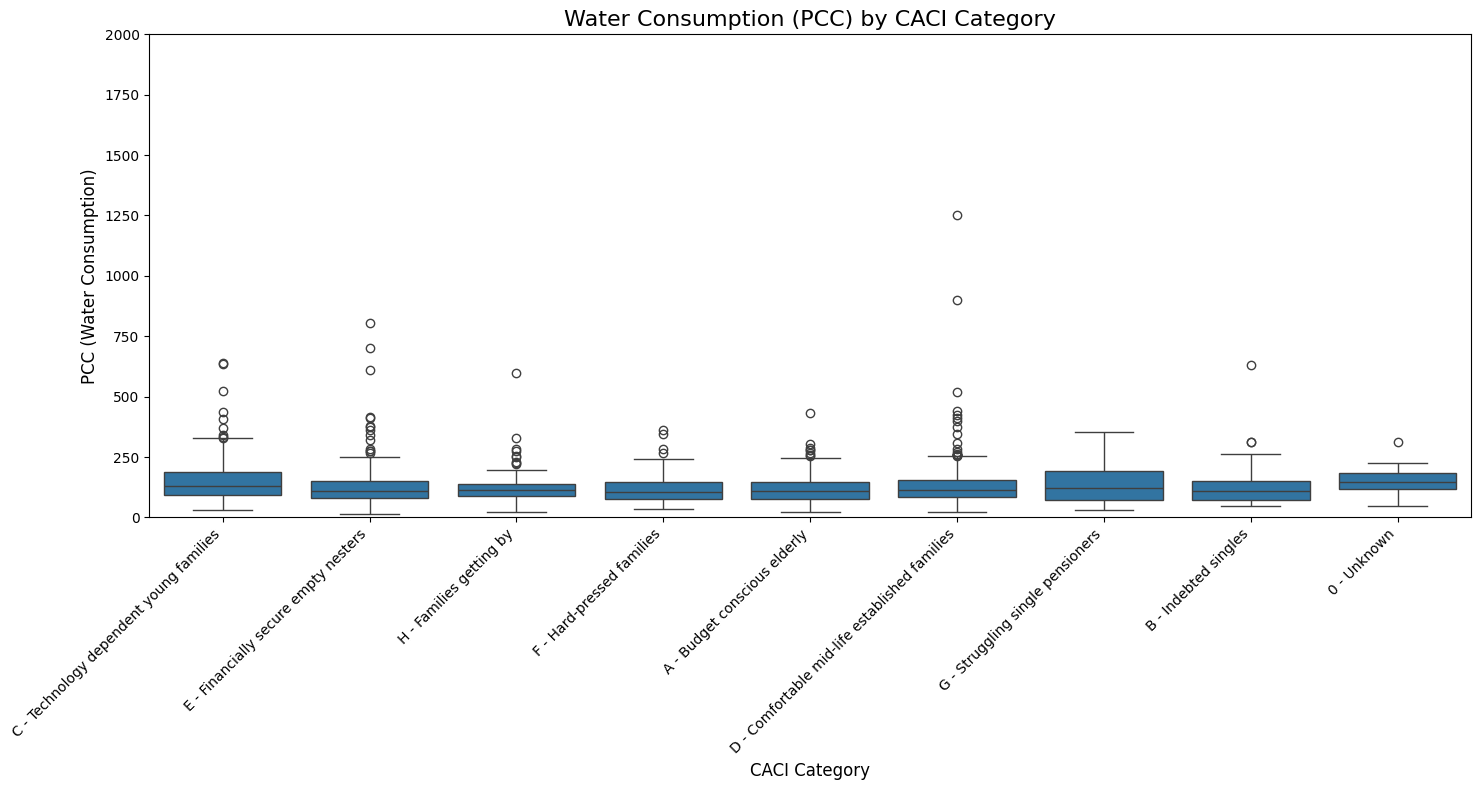

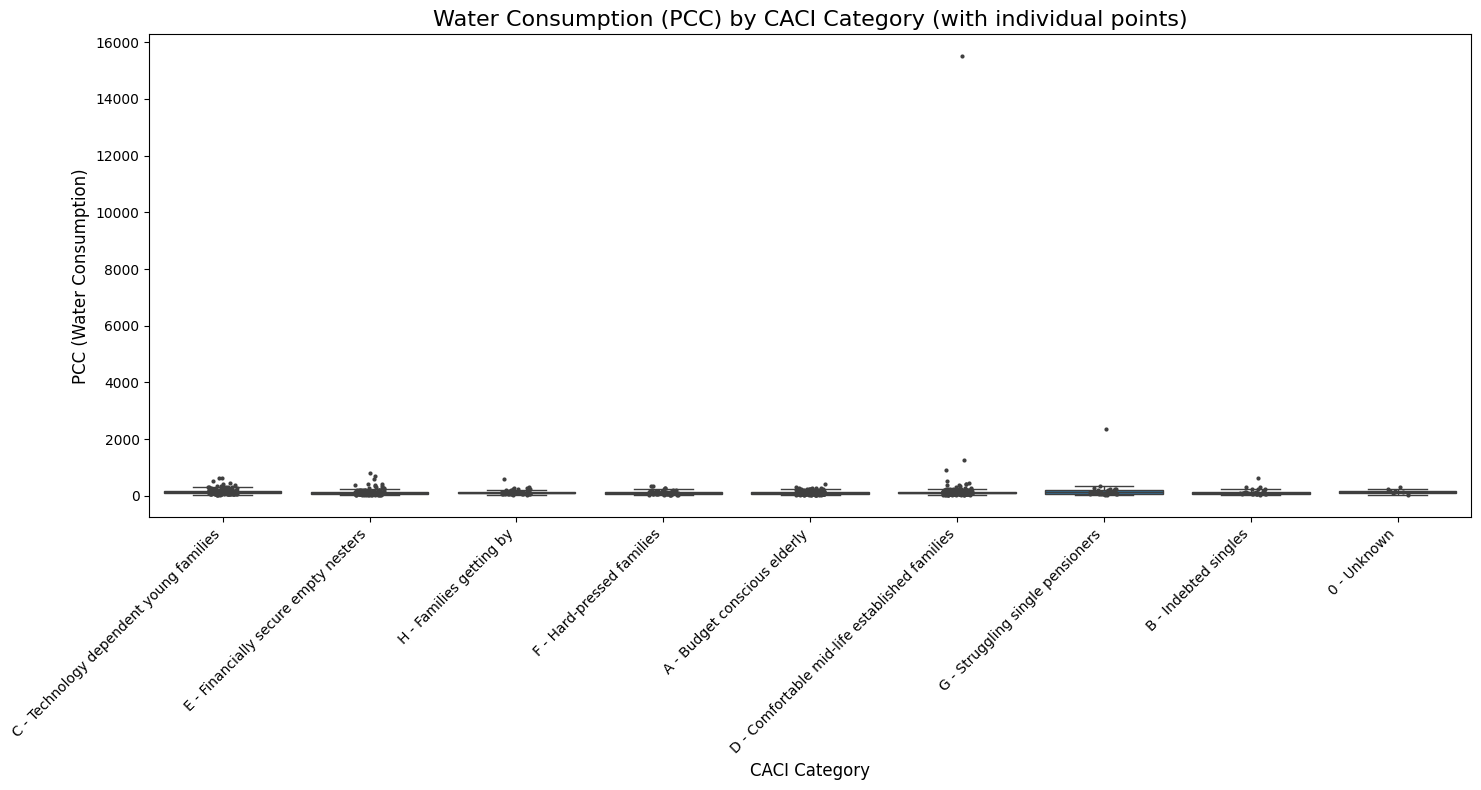

                                               count        mean         std  \
CACI                                                                           
0 - Unknown                                     10.0  159.130000   73.217181   
A - Budget conscious elderly                   205.0  118.945854   58.907573   
B - Indebted singles                            32.0  140.412500  116.369561   
C - Technology dependent young families        162.0  155.189506   98.420057   
D - Comfortable mid-life established families  260.0  196.218846  959.305956   
E - Financially secure empty nesters           166.0  137.527108  107.164784   
F - Hard-pressed families                       64.0  122.112500   69.276794   
G - Struggling single pensioners                35.0  196.931429  381.565177   
H - Families getting by                         66.0  129.254545   84.886255   

                                                min      25%     50%      75%  \
CACI                                  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(x='CACI', y='PCC', data=df)
plt.title('Water Consumption (PCC) by CACI Category', fontsize=16)
plt.xlabel('CACI Category', fontsize=12)
plt.ylabel('PCC (Water Consumption)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 2000)  # Adjust this based on your data distribution
plt.tight_layout()
plt.show()

# Additional plot to show the full range including outliers
plt.figure(figsize=(15, 8))
sns.boxplot(x='CACI', y='PCC', data=df, showfliers=False)
sns.stripplot(x='CACI', y='PCC', data=df, color=".25", size=3)
plt.title('Water Consumption (PCC) by CACI Category (with individual points)', fontsize=16)
plt.xlabel('CACI Category', fontsize=12)
plt.ylabel('PCC (Water Consumption)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print summary statistics
print(df.groupby('CACI')['PCC'].describe())

# Identify the outlier
outlier = df[df['PCC'] > 10000]
print("\nOutlier information:")
print(outlier)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe

# Set a consistent style for all plots
plt.style.use('seaborn')
sns.set_palette("deep")

# 1. Distribution of PCC (Water Consumption)
plt.figure(figsize=(12, 6))
sns.histplot(df['PCC'], kde=True)
plt.title('Distribution of Water Consumption (PCC)', fontsize=16)
plt.xlabel('PCC (Water Consumption)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('1_pcc_distribution.png', dpi=300, bbox_inches='tight')
plt.close()

# # 2. Box Plot of PCC by CACI Category
# plt.figure(figsize=(15, 8))
# sns.boxplot(x='CACI', y='PCC', data=df)
# plt.title('Water Consumption by CACI Category', fontsize=16)
# plt.xlabel('CACI Category', fontsize=12)
# plt.ylabel('PCC (Water Consumption)', fontsize=12)
# plt.xticks(rotation=45, ha='right')
# plt.ylim(0, df['PCC'].quantile(0.99))  # Limiting y-axis to 99th percentile for better visibility
# plt.savefig('2_pcc_by_caci.png', dpi=300, bbox_inches='tight')
# plt.close()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 10))  # Increased figure size for better readability
ax = sns.boxplot(x='CACI', y='PCC', data=df)
plt.title('Water Consumption by CACI Category', fontsize=20)
plt.xlabel('CACI Category', fontsize=14)
plt.ylabel('PCC (Water Consumption)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0, df['PCC'].quantile(0.99))  # Limiting y-axis to 99th percentile

# Add median values on the boxes
medians = df.groupby('CACI')['PCC'].median().values
vertical_offsets = df['PCC'].quantile(0.99) * 0.01  # Offset for text above boxes

for xtick, median in zip(ax.get_xticks(), medians):
    ax.text(xtick, median + vertical_offsets, f'Median: {median:.0f}',
            horizontalalignment='center', fontsize=10, fontweight='bold')

# Add count of data points for each category
counts = df['CACI'].value_counts().sort_index()
for xtick, count in zip(ax.get_xticks(), counts):
    ax.text(xtick, ax.get_ylim()[1], f'n: {count}',
            horizontalalignment='center', verticalalignment='top', fontsize=10)

plt.tight_layout()
plt.savefig('2_pcc_by_caci_enhanced.png', dpi=300, bbox_inches='tight')
plt.close()


# 3. Correlation Heatmap
numeric_cols = ['PCC', 'IMD', 'AGE', 'OCCUPANCY']
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.savefig('3_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# 4. Scatter plots for numeric features vs PCC
for feature in ['IMD', 'AGE', 'OCCUPANCY']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='PCC', data=df)
    plt.title(f'{feature} vs Water Consumption', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('PCC (Water Consumption)', fontsize=12)
    plt.savefig(f'4_{feature}_vs_pcc.png', dpi=300, bbox_inches='tight')
    plt.close()

# 5. Box plots for categorical features vs PCC
for feature in ['TARIFF', 'CUSTOMER_EMPLOYMENT_STATUS', 'CUSTOMER_HOME_OWNER_STATUS']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='PCC', data=df)
    plt.title(f'Water Consumption by {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('PCC (Water Consumption)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, df['PCC'].quantile(0.99))  # Limiting y-axis to 99th percentile
    plt.savefig(f'5_{feature}_vs_pcc.png', dpi=300, bbox_inches='tight')
    plt.close()

# 6. Top 10 Feature Importances (assuming you've already run your Random Forest model)
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Top 10 Most Important Features for Predicting Water Consumption', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.savefig('6_feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()

print("All plots have been saved as PNG files.")

<ipython-input-9-05ffe67c1692>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


All plots have been saved as PNG files.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original data without imputation
df_original = pd.read_excel('/content/data.xlsx')  # Replace with your actual file name

# Check for missing values
missing_values = df_original.isnull().sum()
missing_percentages = 100 * df_original.isnull().sum() / len(df_original)

# Create a dataframe with this information
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentages
})

print("Missing Value Analysis:")
print(missing_df)

# Visualize missing values with percentages on bars
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=missing_df.index, y='Percentage Missing', data=missing_df)
plt.title('Percentage of Missing Values by Feature', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage Missing', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add percentage labels on the bars
for i, v in enumerate(missing_df['Percentage Missing']):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')
plt.close()

print("Missing values analysis plot saved as 'missing_values_analysis.png'")

# Additional: Display basic info about the dataset
print("\nDataset Information:")
print(df_original.info())

# Additional: Display summary statistics
print("\nSummary Statistics:")
print(df_original.describe())

# Save summary to a text file for easy reference
with open('data_summary.txt', 'w') as f:
    f.write("Missing Value Analysis:\n")
    f.write(missing_df.to_string())
    f.write("\n\nDataset Information:\n")
    df_original.info(buf=f)
    f.write("\n\nSummary Statistics:\n")
    f.write(df_original.describe().to_string())

print("Detailed summary saved to 'data_summary.txt'")

Missing Value Analysis:
                            Missing Values  Percentage Missing
ID                                       0                 0.0
PCC                                      0                 0.0
IMD                                     33                 3.3
CACI                                     0                 0.0
AGE                                      0                 0.0
OCCUPANCY                                0                 0.0
TARIFF                                   0                 0.0
CUSTOMER_EMPLOYMENT_STATUS             681                68.1
CUSTOMER_HOME_OWNER_STATUS             269                26.9
Missing values analysis plot saved as 'missing_values_analysis.png'

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          1000